Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. Create publication quality plots. 
Make interactive figures that can zoom, pan, update.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("D:\matplotlib\Indicators.csv")
data.shape

(5656458, 6)

In [3]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


how many unique conuntry names are there?

In [4]:
countries=data["CountryName"].unique()  # tolist convert data into list
len(countries)

247

are there same no of country code?


In [5]:
countrycode=data["CountryCode"].unique()  # should be the same
len(countrycode)

247

Are there many indicators or few ?

In [6]:
indicators=data["IndicatorName"].unique().tolist()
len(indicators)

1344

How many years of data do we have ?


In [7]:
years=data["Year"].unique().tolist()
len(years)

56

what is the range of year

In [8]:
print(str(min(years))+" to "+str(max(years)))


1960 to 2015


# Lets pick a country and an indicator to explore: CO2 Emissions per capita and the USA


In [9]:
mask1=data['IndicatorName'].str.contains('CO2 emissions \(metric')
mask2=data['CountryCode'].str.contains('USA')
# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage=data[mask1 & mask2]


In [10]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


Let's see how emissions have changed over time using MatplotLib


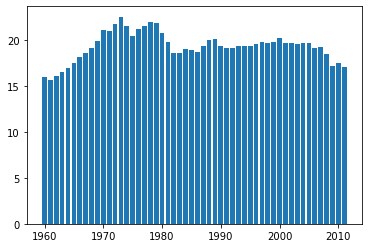

In [11]:
year=stage['Year'].values
co2=stage['Value'].values
plt.bar(year,co2)
plt.show()

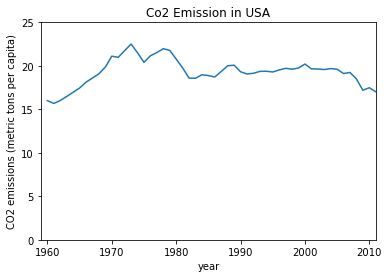

In [12]:
# now lets create line plot

plt.plot(stage['Year'].values,stage['Value'].values)
plt.xlabel("year")
plt.ylabel(stage['IndicatorName'].iloc[0])
plt.title("Co2 Emission in USA")
# to make more honest, start they y axis at 0

plt.axis([1959, 2011,0,25])
plt.show()

**Using Histograms to explore the distribution of values**


In [13]:
hist_data=stage["Value"].values
print(len(hist_data))

52


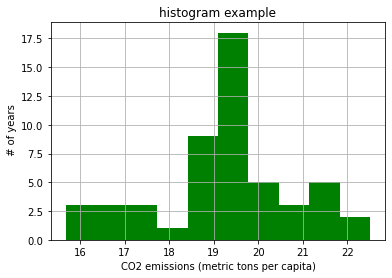

In [14]:
# histogram of the data

plt.hist(hist_data,  10, density=False , facecolor="green")
# density equal to false means wideth is same
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel(" # of years")
plt.title("histogram example")
plt.grid(True)
plt.show()

So the USA has many years where it produced between 19-20 metric tons per capita with outliers on either side.



 # But how do the USA's numbers relate to those of other countries?



In [15]:
# select co2 emission for usa in 2011

hist_indicator="CO2 emissions \(metric"
hist_year=2011
mask1=data["IndicatorName"].str.contains(hist_indicator)
mask2=data["Year"].isin([hist_year])
#apply our mask
co2_2011=data[mask1&mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


For how many countries do we have CO2 per capita emissions data in 2011



In [16]:
print(len(co2_2011))

232


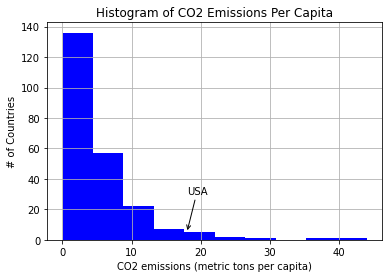

In [17]:
# lets plot histogram of the emission per capita by country

# subplots returns a touple with the figure, axis attributes.


fig, ax = plt.subplots()


ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], facecolor='blue')

#density: width of your bins false will have all same size of bins.

plt.xlabel(stage['IndicatorName'].iloc[0])

plt.ylabel('# of Countries')

plt.title('Histogram of CO2 Emissions Per Capita')

plt.grid(True)
plt.show()








# Matplotlib: Basic Plotting, Part 2

Relationship between GDP and CO2 Emissions in USA

In [18]:
#select GDP per capita emission for the united state
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)


# stage is just those indicators matching the USA for country code and CO2 emissions over time.

gdp_stage=data[mask1&mask2]

#plt gdp stage vs stage

In [19]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [20]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


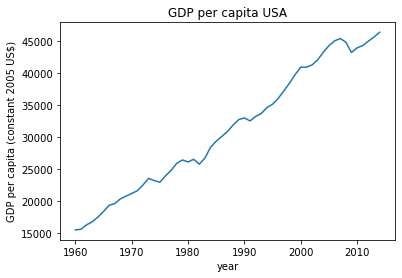

In [21]:
#switch to line plot

plt.plot(gdp_stage['Year'].values,gdp_stage['Value'].values)
plt.xlabel("year")
plt.ylabel(gdp_stage["IndicatorName"].iloc[0])

#label the figure
plt.title("GDP per capita USA")
#to make more honest, start the y axis at 0
#plt.axis([1959,2011,0,25])
plt.show()

# ScatterPlot for comparing GDP against CO2 emissions (per capita)


In [22]:
print("GDP min year="  ,gdp_stage["Year"].min(), "max:", gdp_stage["Year"].max())   
print("co2 min year="  ,gdp_stage["Year"].min(), "max:", gdp_stage["Year"].max())    

GDP min year= 1960 max: 2014
co2 min year= 1960 max: 2014


In [23]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


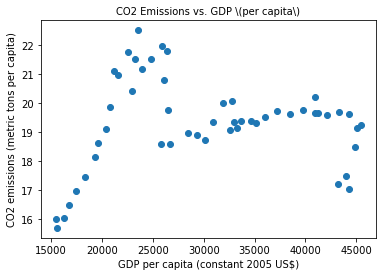

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

#axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value'] #gdp usa
Y = stage['Value'] #co2 usa

axis.scatter(X, Y)
plt.show()